In [22]:
import requests
import pandas as pd
import geopandas as gpd
import zipfile

In [23]:
def download_file(url, save_file):
    # Download and save a file from the url
    with open(save_file, 'wb') as f:
        r = requests.get(url)
        f.write(r.content)  

## Volume 3 - Non ABS Structures
Source https://www.abs.gov.au/AUSSTATS/abs@.nsf/DetailsPage/1270.0.55.003June%202020?OpenDocument

#### 1. Local Government Areas ASGS Ed 2020 Digital Boundaries in ESRI Shapefile Format 

In [24]:
url = "https://www.abs.gov.au/ausstats/subscriber.nsf/log?openagent&1270055003_lga_2020_aust_shp.zip&1270.0.55.003&Data%20Cubes&D18F1308CA028E03CA258588001CC896&0&June%202020&16.06.2020&Latest"
save_to = "../data/raw/shapefile/lga_2020_aust_shp.zip"
download_file(url,save_to)

In [25]:
# Open the zip file, and check the files inside
z = zipfile.ZipFile(save_to)
z.printdir()

File Name                                             Modified             Size
LGA_2020_AUST.dbf                              2020-05-26 12:26:24        77750
LGA_2020_AUST.prj                              2020-05-26 12:26:24          145
LGA_2020_AUST.shp                              2020-05-26 12:26:24     55635912
LGA_2020_AUST.shx                              2020-05-26 12:26:24         4596
LGA_2020_AUST.xml                              2020-05-25 09:00:28        39277


In [26]:
lga_gdf = gpd.read_file("zip://../data/raw/shapefile/lga_2020_aust_shp.zip")
lga_gdf.shape

(562, 6)

In [27]:
lga_gdf.head()

,LGA_CODE20,LGA_NAME20,STE_CODE16,STE_NAME16,AREASQKM20,geometry
0,10050,Albury (C),1,New South Wales,305.9459,"POLYGON ((146.82130 -36.04997, 146.82138 -36.0..."
1,10180,Armidale Regional (A),1,New South Wales,7809.4405,"POLYGON ((151.32425 -30.26923, 151.32419 -30.2..."
2,10250,Ballina (A),1,New South Wales,484.9389,"MULTIPOLYGON (((153.57094 -28.87390, 153.57097..."
3,10300,Balranald (A),1,New South Wales,21690.6753,"POLYGON ((143.00432 -33.78165, 143.01538 -33.7..."
4,10470,Bathurst Regional (A),1,New South Wales,3817.8646,"POLYGON ((149.90753 -33.39968, 149.90717 -33.4..."


<AxesSubplot:>

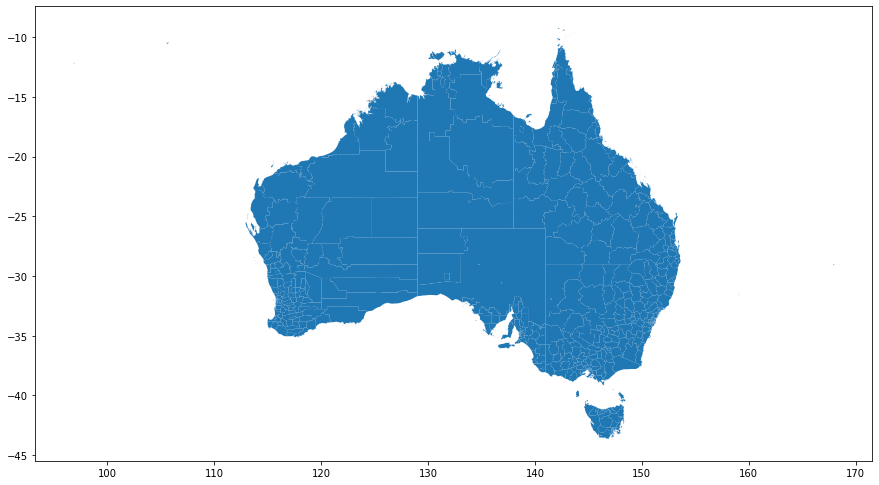

In [28]:
lga_gdf.plot(figsize=(15,10))

In [29]:
lga_gdf.STE_NAME16.value_counts()

Western Australia               139
New South Wales                 131
Victoria                         82
Queensland                       80
South Australia                  73
Tasmania                         31
Northern Territory               20
Australian Capital Territory      3
Other Territories                 3
Name: STE_NAME16, dtype: int64

<AxesSubplot:>

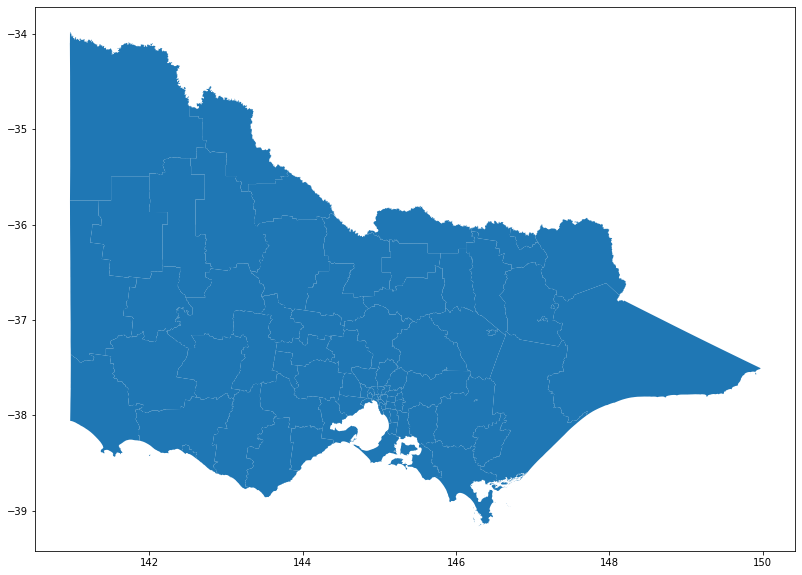

In [30]:
lga_gdf[lga_gdf.STE_NAME16 == 'Victoria'].plot(figsize=(15,10))

#### 2. Postal Areas ASGS Ed 2016 Digital Boundaries in ESRI Shapefile Format 

In [31]:
url = "https://www.abs.gov.au/ausstats/subscriber.nsf/log?openagent&1270055003_poa_2016_aust_shape.zip&1270.0.55.003&Data%20Cubes&4FB811FA48EECA7ACA25802C001432D0&0&July%202016&13.09.2016&Previous"
save_to = "../data/raw/shapefile/poa_2016_aust_shape.zip"
download_file(url,save_to)

In [32]:
# Open the zip file, and check the files inside
z = zipfile.ZipFile(save_to)
z.printdir()

File Name                                             Modified             Size
POA_2016_AUST.xml                              2016-09-08 13:21:10        35216
POA_2016_AUST.dbf                              2016-09-05 12:01:00       160330
POA_2016_AUST.prj                              2016-09-05 12:00:58          168
POA_2016_AUST.shp                              2016-09-05 12:01:00     79773752
POA_2016_AUST.shx                              2016-09-05 12:01:00        21460


In [33]:
poa_gdf = gpd.read_file("zip://../data/raw/shapefile/poa_2016_aust_shape.zip")
poa_gdf.shape

(2670, 4)

<AxesSubplot:>

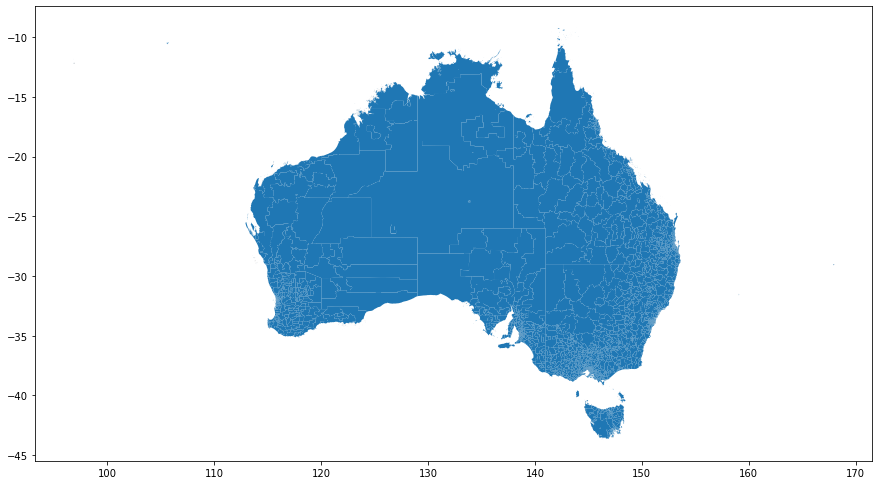

In [34]:
poa_gdf.plot(figsize=(15,10))

In [35]:
poa_gdf.crs

<Geographic 2D CRS: EPSG:4283>
Name: GDA94
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Australia including Lord Howe Island, Macquarie Islands, Ashmore and Cartier Islands, Christmas Island, Cocos (Keeling) Islands, Norfolk Island. All onshore and offshore.
- bounds: (93.41, -60.56, 173.35, -8.47)
Datum: Geocentric Datum of Australia 1994
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [36]:
poa_gdf.head()

,POA_CODE16,POA_NAME16,AREASQKM16,geometry
0,0800,0800,3.1734,"POLYGON ((130.83454 -12.45798, 130.83395 -12.4..."
1,0810,0810,23.7902,"POLYGON ((130.84711 -12.37754, 130.84726 -12.3..."
2,0812,0812,35.8899,"POLYGON ((130.89192 -12.36879, 130.89221 -12.3..."
3,0815,0815,0.6381,"POLYGON ((130.87240 -12.37655, 130.87235 -12.3..."
4,0820,0820,39.0462,"POLYGON ((130.83499 -12.43006, 130.83508 -12.4..."


In [37]:
### Get only postcodes in Victoria
poa_gdf = poa_gdf[poa_gdf.POA_CODE16.str.startswith('3')]

In [38]:
poa_gdf.shape

(698, 4)

<AxesSubplot:>

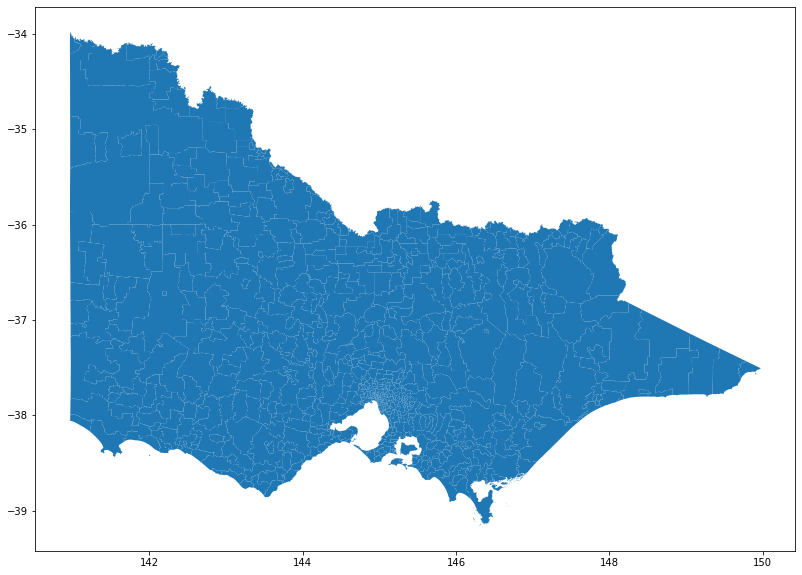

In [39]:
poa_gdf.plot(figsize=(15,10))

In [40]:
poa_gdf.to_file("../data/processed/vic_poa_shapefile.geojson", driver="GeoJSON", index=False)